In [54]:
from sklearn import svm
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from hyperopt import hp, tpe, Trials, fmin
from sklearn.metrics import log_loss, confusion_matrix,classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score

In [55]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [56]:
train = pd.concat([train_x,train_y], axis =1)

In [57]:
train['y'].value_counts()

0    24988
1     2112
Name: y, dtype: int64

In [88]:
train_1 = train.loc[train['y'] == 1].sample(2000)
train_2 = train.loc[train['y'] == 0].sample(3000)
train_mid = pd.concat([train_1,train_2]) 

In [89]:
train_x = train_mid.drop(['y'], axis = 1)
train_y = train_mid['y']

In [90]:
scaler = StandardScaler()
scaler.fit_transform(train_x)
scaler.fit_transform(test_x)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [91]:
clf = svm.SVC(C=6,gamma=6)
clf.fit(tr_x, tr_y)

SVC(C=6, gamma=6)

In [92]:
va_pred = clf.predict(va_x)
score = log_loss(va_y, va_pred)
print(score)

13.207628093413845


In [93]:
print(classification_report(va_y, va_pred))
print(accuracy_score(va_y, va_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       772
           1       0.00      0.00      0.00       478

    accuracy                           0.62      1250
   macro avg       0.31      0.50      0.38      1250
weighted avg       0.38      0.62      0.47      1250

0.6176


C:\Users\odoru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


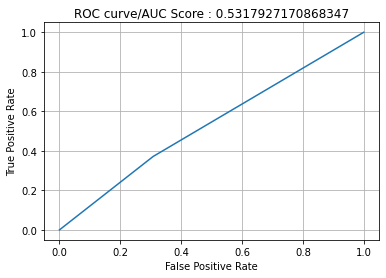

In [67]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,va_pred)
auc_score = roc_auc_score(va_y,va_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

# チューニング後rbfカーネル

In [28]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [29]:
scaler = StandardScaler()
scaler.fit_transform(train_x)
scaler.fit_transform(test_x)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [30]:
tr_y = np.array(tr_y)
tr_y = np.reshape(tr_y,(-1))
va_y = np.array(va_y)
va_y = np.reshape(va_y,(-1))

In [39]:
clf = svm.SVC(C=100,gamma= 100)
clf.fit(tr_x, tr_y)

SVC(C=100, gamma=100)

In [40]:
va_pred = clf.predict(va_x)
score = log_loss(va_y, va_pred)
print(score)

2.5693790853188174


In [41]:
print(classification_report(va_y, va_pred))
print(accuracy_score(va_y, va_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6271
           1       0.00      0.00      0.00       504

    accuracy                           0.93      6775
   macro avg       0.46      0.50      0.48      6775
weighted avg       0.86      0.93      0.89      6775

0.9256088560885609


C:\Users\odoru\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


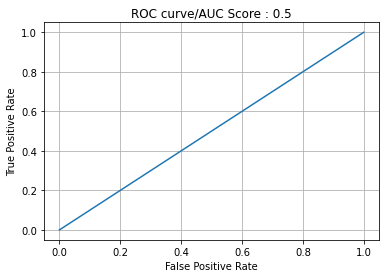

In [42]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,va_pred)
auc_score = roc_auc_score(va_y,va_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)